# Sorting Algorithms
-----
## 1.- Quadratic-Time Sorts 
 - Quadratic-time sorting algorithms have an average and worst-case time complexity of O(n²), making them inefficient for large datasets but useful for small or nearly sorted data due to their simplicity.

### 1.1 Bubble Sort 
- Concept:
    - Repeatedly steps through the list, compares adjacent elements, and swaps them if they are in the wrong order.
    - The largest unsorted element "bubbles up" to its correct position in each pass.
- Time Complexity:
    - Worst/Average Case: O(n²)
    - Best Case: O(n) (if the list is already sorted and optimized with a flag).
- Built-in Alternative:
    - Python’s sorted() (TimSort) is much faster, but Bubble Sort is purely educational.

#### Implementation in Python

In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False  # Optimization: check if any swaps occurred
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]  # Swap
                swapped = True
        if not swapped:  # Early exit if no swaps
            break
    return arr

In [2]:
# Example usage:
arr = [64, 34, 25, 12, 22, 11, 90]
print("Bubble Sort:", bubble_sort(arr))

Bubble Sort: [11, 12, 22, 25, 34, 64, 90]


--------
## 1.2. Insertion Sort
- Concept:
    - Builds the final sorted array one element at a time by inserting each new element into its correct position in the already-sorted part.
    - Efficient for small or nearly sorted data.
- Time Complexity:
    - Worst/Average Case: O(n²)
    - Best Case: O(n) (if the list is already sorted).
- Built-in Alternative:
    - Python’s bisect.insort() can insert elements in a sorted list efficiently, but the full sorting still takes O(n²) if done repeatedly.

#### Implementation in Python

In [3]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:  # Shift elements to make space
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key  # Insert key in correct position
    return arr

In [4]:
# Example usage:
arr = [64, 34, 25, 12, 22, 11, 90]
print("Insertion Sort:", insertion_sort(arr))

Insertion Sort: [11, 12, 22, 25, 34, 64, 90]


-----
## 1.3. Selection Sort
- Concept:
  - Divides the list into a sorted and unsorted part.
  - Repeatedly selects the smallest unsorted element and swaps it with the first unsorted element.
- Time Complexity:
    - Always O(n²) (even if the list is sorted).
    - Minimizes swaps (only O(n) swaps, unlike Bubble Sort).

#### Implementation in Python

In [5]:
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):  # Find the minimum in unsorted part
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]  # Swap
    return arr

# Example usage:
arr = [64, 25, 12, 22, 11]
print("Selection Sort:", selection_sort(arr))

Selection Sort: [11, 12, 22, 25, 64]


### Final Summary
- Complexity:

| Algorithm         | Best Case | Average Case | Worst Case | Stable? | In-Place? | Notes                                  |
|-------------------|-----------|--------------|------------|---------|-----------|----------------------------------------|
| **Bubble Sort**   | O(n)      | O(n²)        | O(n²)      | ✅ Yes  | ✅ Yes    | Simple, but very slow.                |
| **Insertion Sort**| O(n)      | O(n²)        | O(n²)      | ✅ Yes  | ✅ Yes    | Fast for small/nearly-sorted data.     |
| **Selection Sort**| O(n²)     | O(n²)        | O(n²)      | ❌ No   | ✅ Yes    | Minimizes swaps (good for EEPROM).     |

- Observations:
    - Bubble Sort
        - Only useful for education (worst practical performance).
        - Optimization: Early exit if no swaps occur (swapped flag).
    - Insertion Sort
        - Best for small datasets (e.g., <50 elements) or nearly-sorted data (best case O(n)).
        -Used internally in Timsort and QuickSort for small subarrays.
    - Selection Sort
        - Minimizes swaps (O(n) swaps vs O(n²) for others) → Useful for memory-constrained systems.
        - Unstable (does not preserve order of equal elements).
- When to use:
    - Never use Bubble Sort in practice (except for teaching).
    - Insertion Sort: Ideal for tiny arrays (e.g., <50 elements) or as a base case in divide-and-conquer sorts.
    - Selection Sort: Only when write operations are expensive (e.g., sorting flash memory).

---------
--------
## 2.- Comparison-Based Sorts

-----
### 2.1. Merge Sort
- Concept:
    - A divide-and-conquer algorithm that splits the array into two halves, recursively sorts each half, and merges them back in sorted order.
    - Uses extra space for merging, making it not in-place but stable.
- Time Complexity:
    - Best/Average/Worst Case: O(n log n) (always).
    - Space Complexity: O(n) (auxiliary space for merging).
- Built-in Alternative:
    - Python’s sorted() and list.sort() use Timsort (a hybrid of Merge Sort + Insertion Sort).

#### Python Implementation:

In [6]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        
        merge_sort(left)   # Recursively sort left half
        merge_sort(right)   # Recursively sort right half
        
        # Merge step
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        
        # Copy remaining elements (if any)
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr

In [7]:
# Example usage: Try a big one and compare with others, the difference is evident
arr = [38, 27, 43, 3, 9, 82, 10]
print(f"Merge Sort: {arr} ---------> {merge_sort(arr)}")

Merge Sort: [38, 27, 43, 3, 9, 82, 10] ---------> [3, 9, 10, 27, 38, 43, 82]


------
## 2.2. Quick Sort
- Concept:
    - Another divide-and-conquer algorithm that:
        - Chooses a pivot (e.g., last element).
        - Partitions the array into elements less than and greater than the pivot.
        - Recursively sorts the partitions.
    - In-place (no extra space needed) but not stable.
- Time Complexity:
    - Best/Average Case: O(n log n).
    - Worst Case: O(n²) (if pivot selection is bad, e.g., already sorted array).
- Space Complexity: O(log n) (stack space due to recursion).

- Optimizations:
    - Randomized Quick Sort: Pick a random pivot to avoid worst-case O(n²).
    - Hoare’s Partition: More efficient than Lomuto’s.
        - https://www.geeksforgeeks.org/hoare-s-partition-algorithm/
#### Python Implementation (Lomuto Partition Scheme):

In [8]:
def quick_sort(arr, low=0, high=None):
    if high is None:
        high = len(arr) - 1
    if low < high:
        pivot_idx = partition(arr, low, high)
        quick_sort(arr, low, pivot_idx - 1)  # Sort left of pivot
        quick_sort(arr, pivot_idx + 1, high) # Sort right of pivot
    return arr

def partition(arr, low, high):
    pivot = arr[high]  # Choose last element as pivot
    i = low - 1        # Pointer for elements < pivot
    
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  # Swap
    
    arr[i + 1], arr[high] = arr[high], arr[i + 1]  # Place pivot correctly
    return i + 1

In [9]:
# Example usage: Again, try a big one...
arr = [10, 7, 8, 9, 1, 5]
print(f"Quick Sort: {arr} ---------> {quick_sort(arr)}")

Quick Sort: [10, 7, 8, 9, 1, 5] ---------> [1, 5, 7, 8, 9, 10]


-----
## 2.3. Heap Sort
- Concept:
    - Uses a binary heap (priority queue) to sort elements.
    - Steps:
        - Build a max-heap from the array.
        - Repeatedly extract the maximum element and rebuild the heap.
- Time Complexity:
    - Best/Average/Worst Case: O(n log n) (always).
- Space Complexity: O(1) (in-place)
    - In-place but not stable.

- Built-in Alternative:
    - Python’s heapq module provides heap operations, but sorted() is preferred for general use.
#### Python Implementation:

In [10]:
def heap_sort(arr):
    def heapify(arr, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2
        
        if left < n and arr[left] > arr[largest]:
            largest = left
        if right < n and arr[right] > arr[largest]:
            largest = right
        
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]  # Swap
            heapify(arr, n, largest)  # Recursively heapify affected subtree
    
    n = len(arr)
    
    # Build max-heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    
    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # Swap root (max) with last element
        heapify(arr, i, 0)  # Heapify reduced heap
    
    return arr

In [11]:
# Example usage:
arr = [12, 11, 13, 5, 6, 7]
print(f"Heap Sort: {arr} ---------> {heap_sort(arr)}")

Heap Sort: [12, 11, 13, 5, 6, 7] ---------> [5, 6, 7, 11, 12, 13]


### Final Summary
-Complexity:
| Algorithm     | Best Case | Average Case | Worst Case | Stable? | In-Place? | Space Complexity | Notes                                  |
|---------------|-----------|--------------|------------|---------|-----------|------------------|----------------------------------------|
| **Merge Sort** | O(n log n) | O(n log n)   | O(n log n) | ✅ Yes  | ❌ No     | O(n)             | Consistent, good for large data.       |
| **Quick Sort** | O(n log n) | O(n log n)   | O(n²)      | ❌ No   | ✅ Yes    | O(log n)         | Fastest in practice (avg case).        |
| **Heap Sort**  | O(n log n) | O(n log n)   | O(n log n) | ❌ No   | ✅ Yes    | O(1)             | In-place but slower constants.         |
- Observations:
    - Merge Sort
        - Stable and predictable (always O(n log n)), but uses extra memory (O(n)).
        - Preferred for linked lists and external sorting (disk-based data).
    - Quick Sort
        - Fastest in practice (avg case), but worst-case O(n²) if pivot selection is bad.
        - In-place (O(log n) stack space) but not stable.
    - Heap Sort
        - Guaranteed O(n log n) in all cases and in-place (O(1)), but slower in practice due to poor cache locality.
- When to use:
    - Merge Sort:
      - Need of stability (e.g., sorting objects by multiple keys).
      - Data is too large for RAM (external sorting).
    - Quick Sort
        - Choose when:
            - You need average-case speed (most practical cases).
            - Memory is constrained (in-place variants).
        - Avoid when:
            - Worst-case O(n²) is unacceptable (e.g., adversarial inputs).
    - Heap Sort
        - Choose when:
            - You need guaranteed O(n log n) (e.g., real-time systems).
            - In-place sorting with O(1) space is critical.
        - Avoid when:
            - Cache locality matters (poor performance on modern CPUs).
         
#### Quick performance comparison:

In [12]:
import time
import random

def time_sort(sort_func, arr):
    start = time.time()
    sort_func(arr.copy())
    return time.time() - start

n = 1000_000  # Try n=100_000 to see differences
arr = [random.randint(0, 150000000) for _ in range(n)]

print(f"n={n}")
print("Merge Sort (built-in):", time_sort(sorted, arr), "sec")# Python's TimSort
print("Merge Sort (custom):", time_sort(merge_sort, arr), "sec")  
print("Quick Sort (custom):", time_sort(quick_sort, arr), "sec")  
print("Heap Sort (custom):", time_sort(heap_sort, arr), "sec")

n=1000000
Merge Sort (built-in): 0.17019987106323242 sec
Merge Sort (custom): 3.1615326404571533 sec
Quick Sort (custom): 2.0828185081481934 sec
Heap Sort (custom): 5.23399806022644 sec


-----
-----
## 3. Linear Time Sorting
Under certain conditions, it is possible to order in linear time here we review one example.

-----
### 3.1.- Radix-Sort:
- Type:
    -  Non-comparison-based (integer/string sorting)
- Philosophy:
    - Digit-by-digit or character-by-character sorting using a stable subroutine (often Counting Sort).
- Key Insight:
    - Exploits the fixed-length structure of keys (e.g., integers or fixed-width strings).

- Algorithm properties

| Property         | Value                          | Notes                                  |
|------------------|--------------------------------|----------------------------------------|
| **Time Complexity** | O(nk)                        | `n` = number of elements, `k` = key length (digits/characters) |
| **Space Complexity** | O(n + b)                   | `b` = base (e.g., 10 for decimal)      |
| **Stable?**       | ✅ Yes                        | Preserves order of equal keys.         |
| **In-Place?**     | ❌ No                         | Requires auxiliary space.              |
| **Works On**      | Integers, fixed-length strings | Negative numbers need special handling.|


### Implementations in Python
- LSD (Least Significant Digit) Radix Sort for Integers

In [13]:
def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10  # Base-10 digits

    # Count occurrences per digit
    for num in arr:
        index = (num // exp) % 10
        count[index] += 1

    # Cumulative count
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build output array
    for i in range(n - 1, -1, -1):
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1

    # Copy back to original array
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        counting_sort(arr, exp)
        exp *= 10
    return arr

In [14]:
# Example usage:
arr = [170, 45, 75, 90, 802, 24, 2, 66]
print("Radix Sort:", radix_sort(arr.copy()))

Radix Sort: [2, 24, 45, 66, 75, 90, 170, 802]


- MSD (Meast Significant Digit) Radix Sort for Strings

In [15]:
def msd_radix_sort(arr, idx=0):
    if len(arr) <= 1:
        return arr
    
    # Group strings by current character
    buckets = {}
    for s in arr:
        char = s[idx] if idx < len(s) else ''
        if char not in buckets:
            buckets[char] = []
        buckets[char].append(s)
    
    # Recursively sort each bucket
    sorted_arr = []
    for char in sorted(buckets.keys()):
        sorted_arr.extend(msd_radix_sort(buckets[char], idx + 1))
    return sorted_arr

In [16]:
# Example usage:
strings = ["apple", "banana", "ape", "zoo", "bat"]
print("MSD Radix Sort:", msd_radix_sort(strings))

MSD Radix Sort: ['ape', 'apple', 'banana', 'bat', 'zoo']


- Observations:
    - Hybrid Approach: Some libraries combine Radix Sort with QuickSort for mixed datasets (e.g., Java’s Arrays.sort for integers).
- When to use:
   - Use Radix Sort when:
        - Keys have fixed width (e.g., 32-bit integers, fixed-length strings).
        - k (key length) is small compared to n (e.g., k < log n).
        - Stability is required (e.g., sorting by multiple columns).
    - Avoid Radix Sort for:
        - Variable-length data (e.g., arbitrary strings).
        - Floating-point numbers (requires extra steps).
    
         
#### Quick performance comparison:

In [17]:
# Performance test
import time
import random

arr = [random.randint(0, 1000000) for _ in range(1_000_000)]

start = time.time()
radix_sort(arr.copy())  # Use for large fixed-width integers
print(f"Radix Sort: {time.time() - start:.2f} sec")

start = time.time()
sorted(arr)  # Python's TimSort (Quick + Merge Sort hybrid)
print(f"Timsort: {time.time() - start:.2f} sec")

Radix Sort: 2.52 sec
Timsort: 0.15 sec


### Comparison Table
| Algorithm      | Time Complexity | Space Complexity | Stable? | In-Place? | Best For                          | Worst For                     |
|----------------|------------------|-------------------|---------|-----------|-----------------------------------|-------------------------------|
| **Radix Sort** | O(nk)            | O(n + b)          | ✅ Yes  | ❌ No     | Fixed-width keys (ints/strings)   | Variable-length data          |
| **Quick Sort** | O(n log n) avg   | O(log n)          | ❌ No   | ✅ Yes    | General-purpose sorting           | Adversarial inputs (O(n²))    |
| **Merge Sort** | O(n log n)       | O(n)              | ✅ Yes  | ❌ No     | Large/stable sorts                | Memory-constrained systems    |
| **Heap Sort**  | O(n log n)       | O(1)              | ❌ No   | ✅ Yes    | In-place with guarantees          | Cache-sensitive workloads     |
| **Timsort**    | O(n log n)       | O(n)              | ✅ Yes  | ❌ No     | Real-world mixed data (Python)    | Extremely small datasets      |

----
----
## 4. Hybrid Sorting Algorithms
### 4.1. Timsort
- Philosophy:
    - Combines Merge Sort + Insertion Sort + optimizations for real-world data.
- Used in:
    - Python (sorted()), Java, Android, Swift.
 
#### Python's built-in sorted() uses Timsort:

In [18]:
arr = [5, 2, 3, 1, 4]
sorted_arr = sorted(arr)  # Hybrid of Merge Sort + Insertion Sort
print("Timsort:", sorted_arr)

Timsort: [1, 2, 3, 4, 5]


### 4.2. Introsort
- Philosophy:
    - Combines Quick Sort + Heap Sort + Insertion Sort to avoid worst-case scenarios.
- Used in:
    - C++ STL (std::sort), Rust.
#### Implementation in Python

In [19]:
import math

def introsort(arr, depth_limit=None):
    if depth_limit is None:
        depth_limit = 2 * math.floor(math.log2(len(arr)))
    _introsort(arr, 0, len(arr), depth_limit)

def _introsort(arr, start, end, depth_limit):
    if end - start <= 16:
        insertion_sort(arr, start, end)  # Switch to Insertion Sort for small arrays
    elif depth_limit == 0:
        heapsort(arr, start, end)  # Fallback to Heap Sort
    else:
        pivot = partition(arr, start, end)  # Quick Sort partition
        _introsort(arr, start, pivot, depth_limit - 1)
        _introsort(arr, pivot + 1, end, depth_limit - 1)

def partition(arr, start, end):
    pivot = arr[end - 1]
    i = start - 1
    for j in range(start, end - 1):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[end - 1] = arr[end - 1], arr[i + 1]
    return i + 1

def insertion_sort(arr, start, end):
    for i in range(start + 1, end):
        key = arr[i]
        j = i - 1
        while j >= start and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def heapsort(arr, start, end):
    def heapify(arr, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2
        if left < n and arr[left] > arr[largest]:
            largest = left
        if right < n and arr[right] > arr[largest]:
            largest = right
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = end - start
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr[start:end], n, i)
    for i in range(n - 1, 0, -1):
        arr[start], arr[start + i] = arr[start + i], arr[start]
        heapify(arr[start:start + i], i, 0)

In [20]:
# Example usage
arr = [5, 2, 3, 1, 4]
introsort(arr)
print("Introsort:", arr)

Introsort: [1, 2, 3, 4, 5]


### Performance Comparison

In [21]:
import time
import random
import numpy as np
from IPython.display import display, Markdown

# Generate test data
n = 1_000_000
arr = [random.randint(0, n) for _ in range(n)]
partially_sorted = sorted(arr[:n//2]) + arr[n//2:]  # Simulate real-world data

def benchmark(sort_func, data, name):
    data_copy = data.copy()
    start = time.time()
    sort_func(data_copy)
    return f"{name}: {time.time() - start:.4f} sec"

# Compare Timsort (built-in) vs. Introsort (custom)
display(Markdown("### Benchmark (n=1,000,000)"))
results = [
    benchmark(sorted, arr, "Timsort (Random Data)"),
    benchmark(sorted, partially_sorted, "Timsort (Partially Sorted)"),
    benchmark(introsort, arr, "Introsort (Random Data)"),
    benchmark(introsort, partially_sorted, "Introsort (Partially Sorted)")
]
for result in results:
    display(Markdown(f"- {result}"))

### Benchmark (n=1,000,000)

- Timsort (Random Data): 0.1660 sec

- Timsort (Partially Sorted): 0.1022 sec

- Introsort (Random Data): 1.8871 sec

- Introsort (Partially Sorted): 2.2622 sec

### Scaling Comparison:

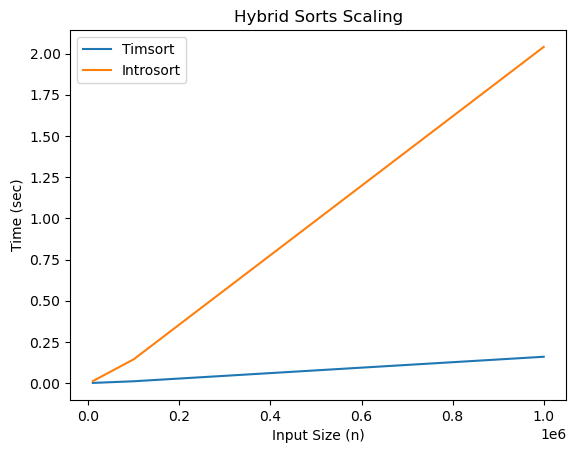

In [22]:
import matplotlib.pyplot as plt

sizes = [10_000, 100_000, 1_000_000]
timsort_times = []
introsort_times = []

for n in sizes:
    arr = [random.randint(0, n) for _ in range(n)]
    start = time.time()
    sorted(arr.copy())
    timsort_times.append(time.time() - start)
    start = time.time()
    introsort(arr.copy())
    introsort_times.append(time.time() - start)

plt.plot(sizes, timsort_times, label="Timsort")
plt.plot(sizes, introsort_times, label="Introsort")
plt.xlabel("Input Size (n)"); plt.ylabel("Time (sec)"); plt.legend()
plt.title("Hybrid Sorts Scaling")
plt.show()

Comparison of Timsort and IntroSort
| Algorithm  | Time Complexity       | Space Complexity | Stable? | In-Place? | Key Hybrid Trick                     | Best For                          |
|------------|-----------------------|------------------|---------|-----------|--------------------------------------|-----------------------------------|
| **Timsort**| O(n log n) worst-case | O(n)             | ✅ Yes  | ❌ No     | Merge Sort + Insertion Sort + Gallop | Real-world data (partially sorted)|
| **Introsort**| O(n log n) worst   | O(log n)         | ❌ No   | ✅ Yes    | QuickSort + HeapSort fallback        | General-purpose, adversarial-safe|

### Final Summary:
- Key Takeaways
    - Timsort:
        - Optimized for real-world data (runs in O(n) on partially sorted arrays).
        - Stable but requires O(n) space.
        - Python’s secret weapon for sorted() and list.sort().
    - Introsort:
        - Guaranteed O(n log n) even for adversarial inputs.
        - In-place (O(log n) space) but not stable.
        - Used in C++ STL for predictable performance.
- When to Choose Which?
    - Use Timsort if:
        - Your data is partially sorted (e.g., log files, time-series).
        - Stability matters (e.g., sorting database records by multiple columns).
    - Use Introsort if:
        - You need guaranteed O(n log n) (e.g., security-critical applications).
        - Memory is limited (in-place sorting required).